# Bank Churn prediction

Customers plays a big part in banking industries where they contributes to the growth of banks through despoits , loans, investments and many more activties they can participate. Banks are offerring more and wider variety of products in return for consumer loyalty. Due to todays's easy access to details and promotions, banks are having issue of consumers moving to their competitors for added value or better returns. Today as internet and informations are updated real time, banks are continuing to improve on their service, products and managing the respond timing to provide more transparent and rewarding banking expereince for consumers. However banks are looking into anticipating the ideal type of demographic for bank churn as to zoom in and retain them through more personalised services, hence i would like to create a machine learning model to anticipate bank churn. 

For this study i would be taking Churn_Modelling.csv from kaggle. \
ref: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

For this study i will break down into 3 parts namely:\
Part A : Read and clean data\
Part B : Explore and Analysis data\
Part C : Machine Learning 

We would first read and clean the data, check for any missing value and undestanding the dataset. Secondly we would explore and try to analysis the data with some questions as guidelines. Lastly we would try to use 4 models namely,: 'KNN, Logistic Regression, Guassian Naive Bayes and Random forest to test on their performance on this dataset, after which we would select the best performance model through measurements of confusion metrix, F1 score and ROC curve and lastly we will do fine tuning to the best model.

Below are the questions we would try to answer with this dataset and to find some insights for analysis:
1) What is the relationship between age and bank churn in different country?\
2) What is the relationship of Credit Score, gender and bank churn?\
3) Does active members with longer tenure means low exit rate?\
4) Does having a credit card and more products have a lower tendency of bank churn?\
5) What is the relationship between estimated salary and age?\
6) What is the correlation-ship  between the elements?

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
# create a function to change column to dummy figures
def get_dummies(dataframe, column):
    dataframe[column] = pd.get_dummies(dataframe[column])
    
def remove_outlier(dataframe):
    for i in dataframe:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df[i] = df[i][~((df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)))]
        df[i].shape
        
def auc_curve_graph(model,classifier):
    area_under_curve = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=str(model) + '(area = %0.2f)' % area_under_curve)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

# Part A : Read and clean data

In [3]:
# read file
df = pd.read_csv('Bank_Churn_Dataset_(Ang_Wee_Hwa).csv')

In [4]:
# Before Cleaning
display(df.head()) # check the dataset and the columns inside it
df.info() # check for any null value and the number of elements in each columns

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.Balance.isin([0]).sum() # count the number of 0 value in balance column.

3617

In [6]:
# drop the columns not needed. 
df = df.drop(['RowNumber','CustomerId','Surname','Balance'],axis = 1)

In [7]:
# After cleaning
display(df.head()) # check the dataset and the columns inside it
df.info() # check for any null value and the number of elements in each columns

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,1,1,1,101348.88,1
1,608,Spain,Female,41,1,1,0,1,112542.58,0
2,502,France,Female,42,8,3,1,0,113931.57,1
3,699,France,Female,39,1,2,0,0,93826.63,0
4,850,Spain,Female,43,2,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


### Observation: 
From the dataset we can observe that for balance more than 36 percent of it is zero hence it would not be ideal for our analysis however the other columns are still important for the observations hence we will drop the columns. Row number, customer Id and surname is also not needed in the machine learning hence will be removed.

# Part B : Explore and analysis Data

### 1) What is the relationship between age and bank churn in different country?

<AxesSubplot:xlabel='Exited', ylabel='Age'>

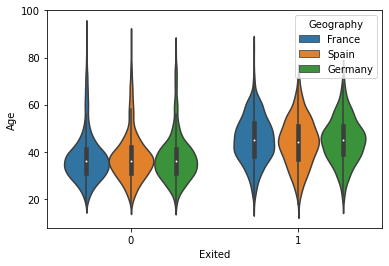

In [8]:
sns.violinplot(x="Exited", y="Age", hue = 'Geography', data=df)

### Observation: 
From the graph we can see that the bank churn rate for higher median age of 40 to 50 is higher among the lower median age of 30 to 40 which stays with the bank. Germany have a higher bank churn rate as compared to the other 2 countries. Hence i would reccomend the bank to offer more products which suits the age group of elderlies or retirees who are more focus on quality living and sustainability of daily activities after retire in germany which may includes health care policy or retire plans.

### 2) What is the relationship of Credit Score, gender and bank churn?

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

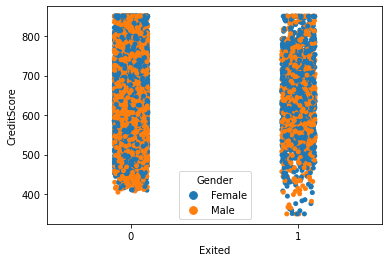

In [9]:
sns.stripplot(x="Exited", y="CreditScore", hue='Gender',data=df,jitter=True)

### Observation: 
From the graph we can see that the bank churn for female is more than male.  Credit score for exit is normal from score between 400 to 500 onwards. Would advise to offer more female exclusive product on wellness and shopping rebates which may include credit cards for ladies and rebates or incentives on shopping malls using selected products.

### 3) Does active members with longer tenure means lower exit rate?

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

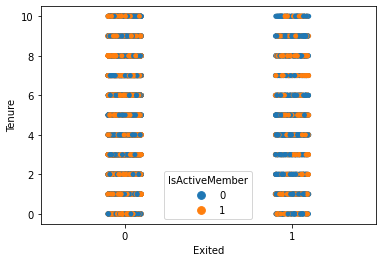

In [10]:
sns.stripplot(x="Exited", y="Tenure", hue = 'IsActiveMember', data=df)

### Observation: 
From the graph we can observe that active members with 10 years tenure are more loyal, however tenure active members in tenure year of 7 have a high tendency of bank churn hence would advise to revisit the cluster of active consumer with 7 years of tenure with the bank and provide a personalised service according to their needs or provide loyalty card for customers with 7 years and above tenure.

### 4) Does having a credit card and more products have a lower tendency of bank churn?

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

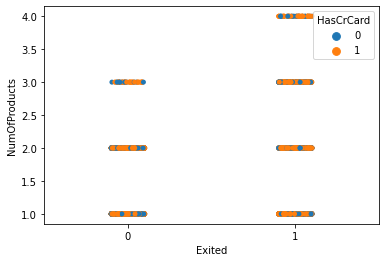

In [11]:
sns.stripplot(x="Exited", y="NumOfProducts", hue = 'HasCrCard', data=df)

### Observation: 
From the graph most of the customer has credit card for those exiting the relationship with the bank however existing clients does not hold 4 or more products within the bank. We can also see the the more products the customer holds including credit cards have a higher tendency of bank churn. With the observation i would reccomend to relook into the credit card benefits and charges against competitors to retain more customers. 

### 5) What is the relationship between estimated salary, age and bank churn?

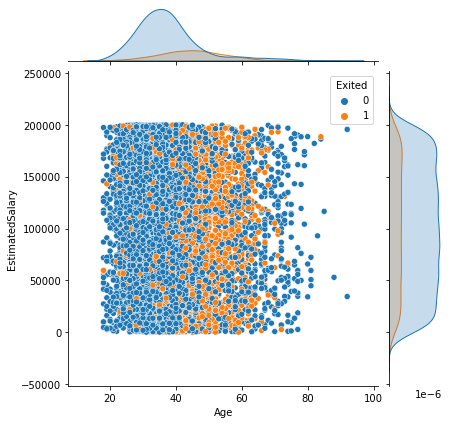

In [12]:
sns.jointplot(x="Age", y="EstimatedSalary", hue = 'Exited' , data=df)

### Observation: 
From the graph we can see that in age 40 to 60 with estimated salary of 100,000 to 150,000 and above have a higher bank churn rate. Hence with this finding i would suggest to offer special accounts or exclusive privilledges to segment of customers as they are also will provide a high returns for the banks for exmaple a higher interest rate for 100,000 retiree plan and personal bankers.

### 6) What is the correlationship between the elements?

In [13]:
corr2 = df.corr()
corr2.style.background_gradient(cmap="coolwarm").set_precision(5)

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00000,-0.00396,0.00084,0.01224,-0.00546,0.02565,-0.00138,-0.02709
Age,-0.00396,1.00000,-0.01000,-0.03068,-0.01172,0.08547,-0.00720,0.28532
Tenure,0.00084,-0.01000,1.00000,0.01344,0.02258,-0.02836,0.00778,-0.01400
NumOfProducts,0.01224,-0.03068,0.01344,1.00000,0.00318,0.00961,0.01420,-0.04782
HasCrCard,-0.00546,-0.01172,0.02258,0.00318,1.00000,-0.01187,-0.00993,-0.00714
IsActiveMember,0.02565,0.08547,-0.02836,0.00961,-0.01187,1.00000,-0.01142,-0.15613
EstimatedSalary,-0.00138,-0.00720,0.00778,0.01420,-0.00993,-0.01142,1.00000,0.01210
Exited,-0.02709,0.28532,-0.01400,-0.04782,-0.00714,-0.15613,0.01210,1.00000


# Part C : Machine Learning

We will be using 4 model to predict bank churn and choose the model with the best result for hyper parimeter tuning. \
For this study we will use confusion matrix and Roc curve for evaluation so as to have the same measing tools to have a fair measurement

### Identifying outliers

In [14]:
# using the function created to remove cloumns
get_dummies(df,'Geography')
get_dummies(df,'Gender')

In [15]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8]] # allocate all the features to the X column
y = df.iloc[:, 9] # allocate the exited column as the label in y

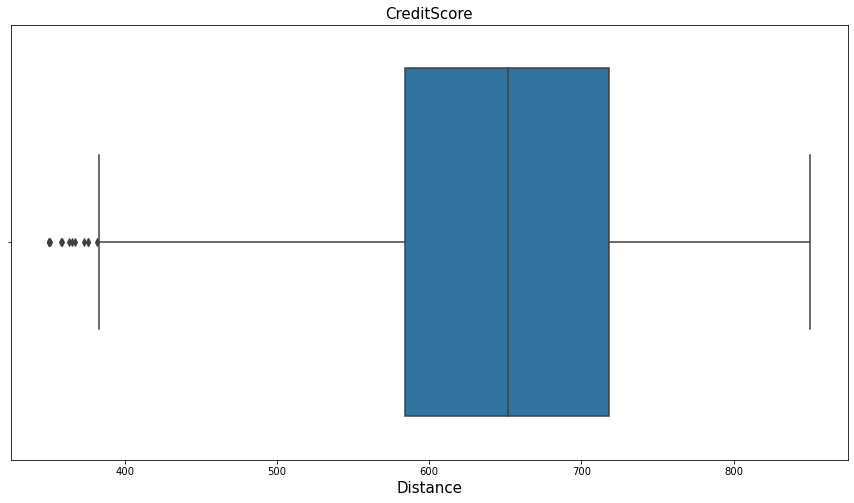

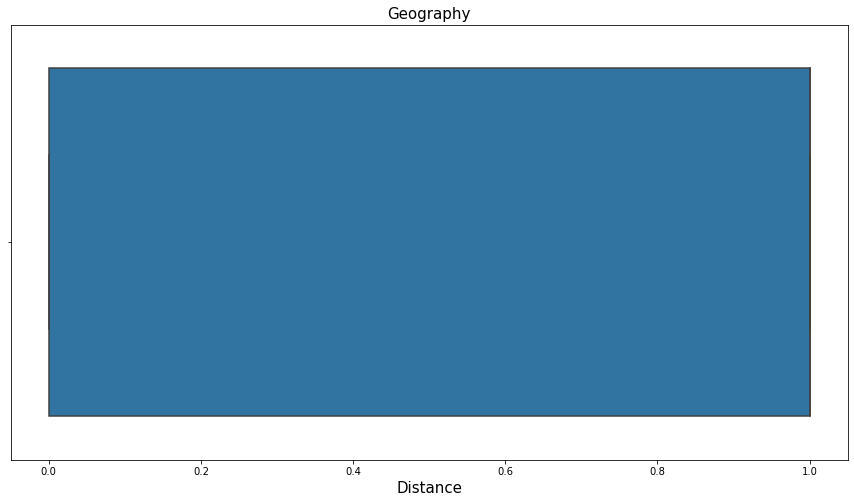

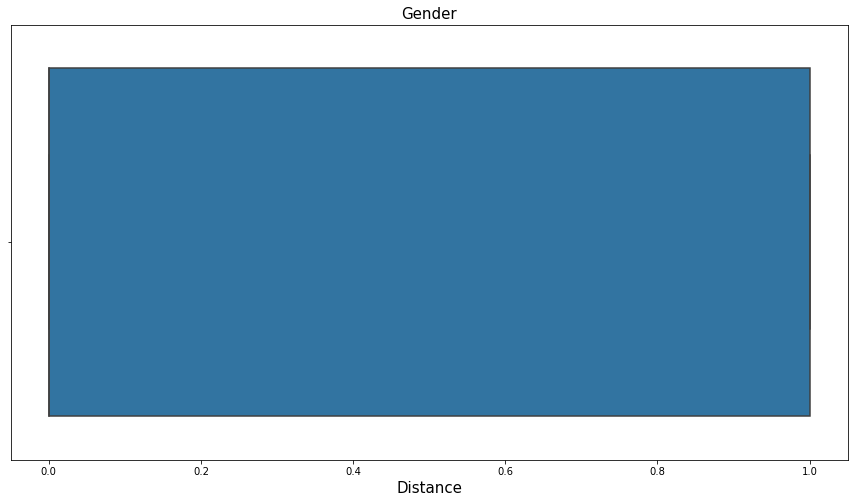

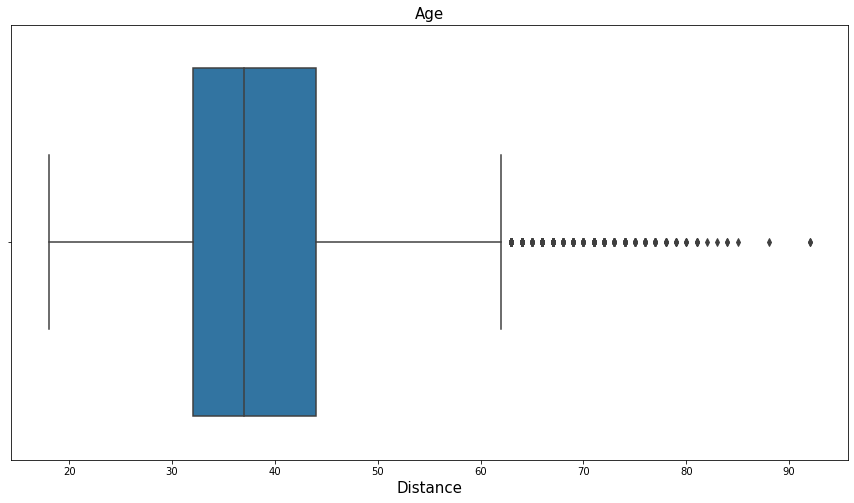

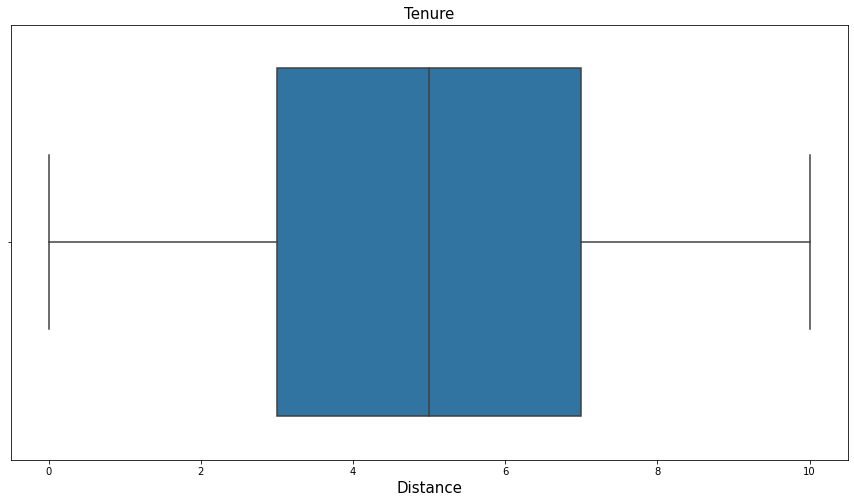

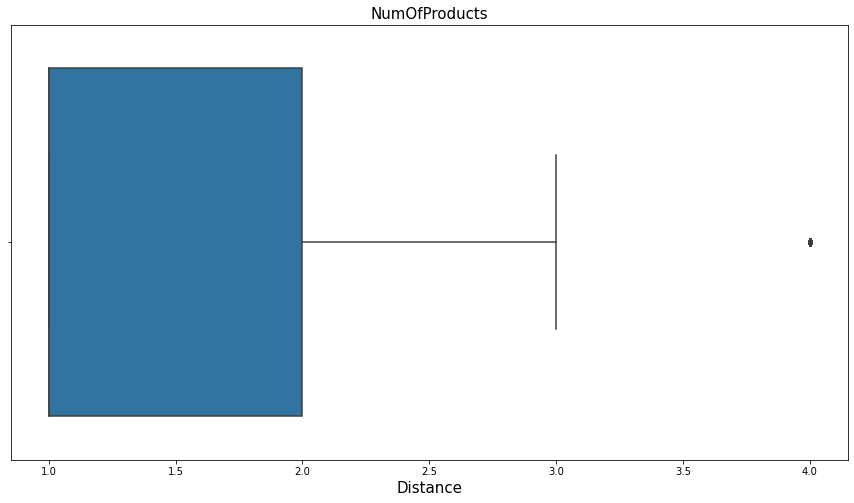

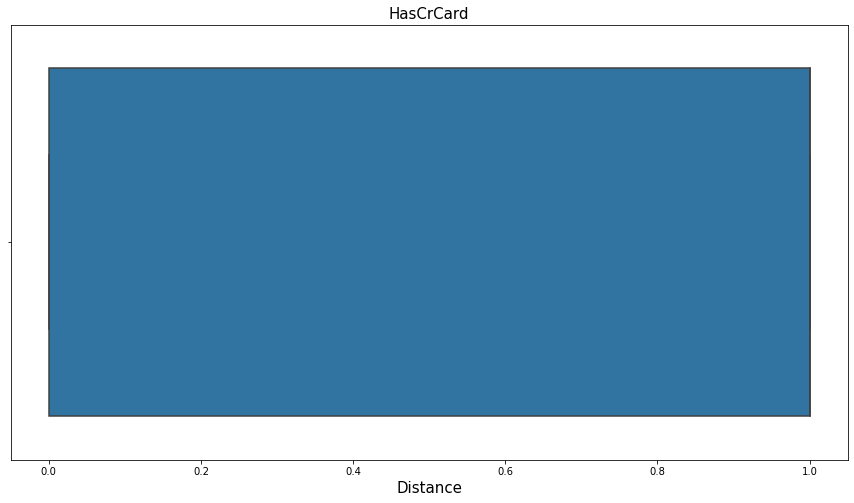

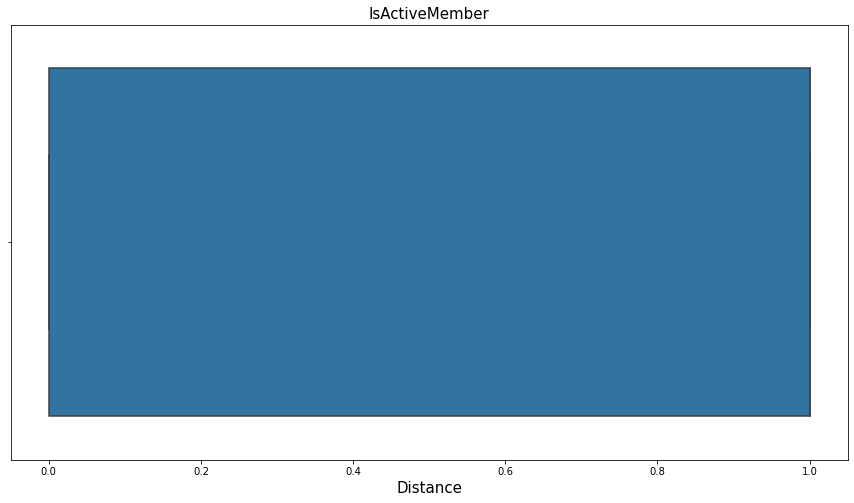

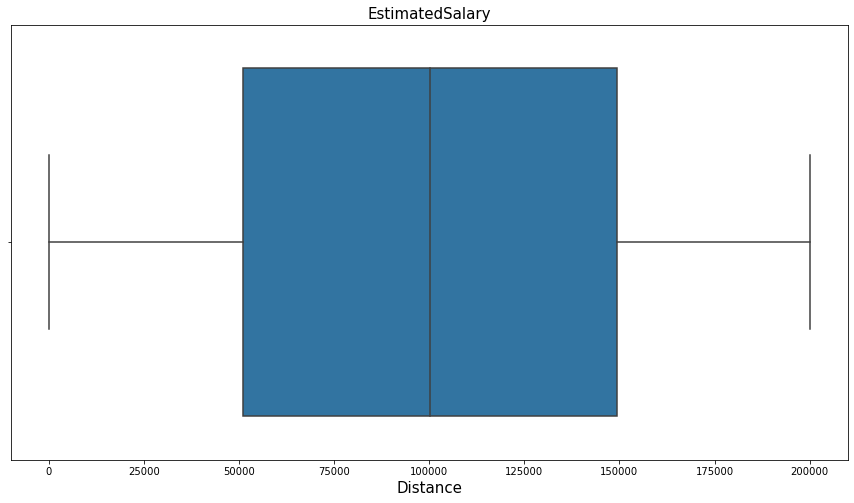

In [16]:
# plot to find any outliers in columns and remove any if needed
for i in X.columns:
    plt.figure(figsize = (15,8))
    sns.boxplot(x = df[i])
    plt.title(i, fontsize = 15)
    plt.xlabel('Distance', fontsize = 15)
plt.show()

from the boxplot with 1st and 3rd quantile we can identify that there are outliers in credit score, age and number of products hence to have a better balance dataset for machine learning we will remove the outliers. 

In [17]:
#use fucntion created to remove outliers
remove_outlier(X.columns)

In [18]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9568 non-null   float64
 1   Geography        9568 non-null   uint8  
 2   Gender           9568 non-null   uint8  
 3   Age              9568 non-null   float64
 4   Tenure           9568 non-null   int64  
 5   NumOfProducts    9568 non-null   float64
 6   HasCrCard        9568 non-null   int64  
 7   IsActiveMember   9568 non-null   int64  
 8   EstimatedSalary  9568 non-null   float64
 9   Exited           9568 non-null   int64  
dtypes: float64(4), int64(4), uint8(2)
memory usage: 691.4 KB


In [19]:
# preparing data training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)
sc = StandardScaler() #scale the data
X_train = sc.fit_transform(X_train) #fit into the train dataset
X_test = sc.transform(X_test)

### SMOTE

In [20]:
unique, count = np.unique(y_train, return_counts = True)
y_train_count = { k:v for (k,v) in zip (unique, count) }
y_train_count

{0: 6369, 1: 1631}

In [21]:
sm = SMOTE(random_state = 88)
X_train_rs, y_train_rs = sm.fit_resample(X_train, y_train) 

In [22]:
unique, count = np.unique(y_train_rs, return_counts = True)
y_train_count = { k:v for (k,v) in zip (unique, count) }
y_train_count

{0: 6369, 1: 6369}

### K-Nearest Neighbour

In [23]:
classifier = KNeighborsClassifier() #define classifier
classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = classifier.predict(X_test) # predict and test

[[1202  392]
 [ 153  253]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1594
           1       0.39      0.62      0.48       406

    accuracy                           0.73      2000
   macro avg       0.64      0.69      0.65      2000
weighted avg       0.79      0.73      0.75      2000



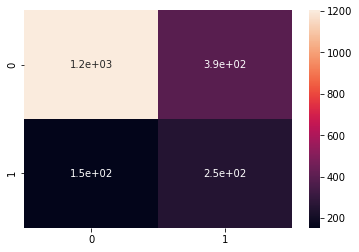

In [24]:
knn_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(knn_cm, annot=True) # plot the confusion metrix
print(knn_cm) 
print(classification_report(y_test, y_pred))

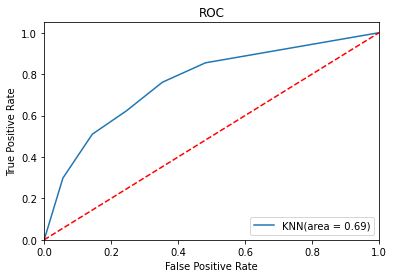

In [25]:
auc_curve_graph('KNN',classifier)

### Logistic Regression

In [26]:
classifier = LogisticRegression() # define classifier
classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = classifier.predict(X_test) # predict and test

[[1106  488]
 [ 129  277]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1594
           1       0.36      0.68      0.47       406

    accuracy                           0.69      2000
   macro avg       0.63      0.69      0.63      2000
weighted avg       0.79      0.69      0.72      2000



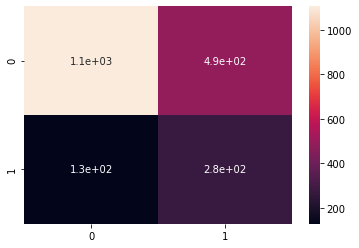

In [27]:
lr_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(lr_cm, annot=True) # plot the confusion metrix
print(lr_cm)
print(classification_report(y_test, y_pred))

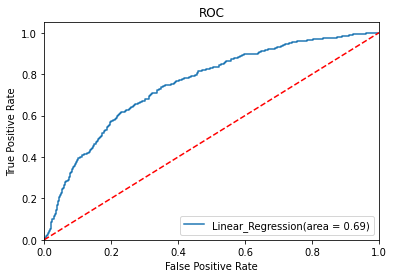

In [28]:
auc_curve_graph('Linear_Regression',classifier)

### Gaussian naive bayes

In [29]:
classifier = GaussianNB() #define classifier
classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = classifier.predict(X_test) # predict and test

[[1174  420]
 [ 124  282]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1594
           1       0.40      0.69      0.51       406

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.73      0.75      2000



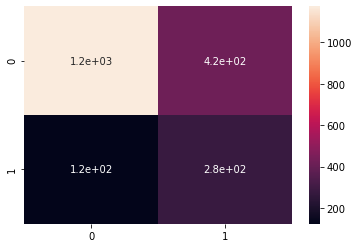

In [30]:
gb_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(gb_cm, annot=True) # plot the confusion metrix
print(gb_cm)
print(classification_report(y_test, y_pred))

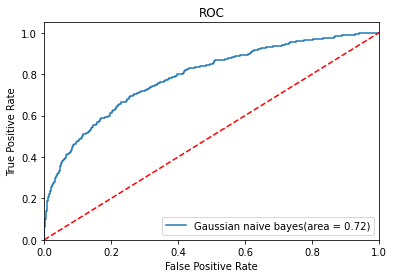

In [31]:
auc_curve_graph('Gaussian naive bayes',classifier)

### Random Forest

In [32]:
classifier = RandomForestClassifier() # define classifer 
classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = classifier.predict(X_test) # predict and test

[[1411  183]
 [ 192  214]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1594
           1       0.54      0.53      0.53       406

    accuracy                           0.81      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.81      0.81      0.81      2000



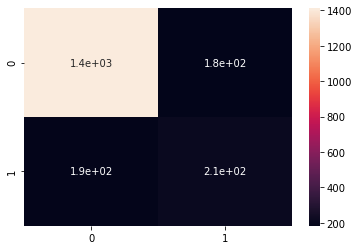

In [33]:
rf_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(rf_cm, annot=True) # plot the confusion metrix
print(rf_cm)
print(classification_report(y_test, y_pred))

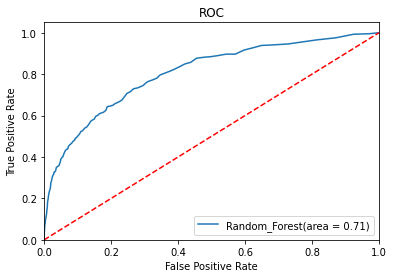

In [34]:
auc_curve_graph('Random_Forest',classifier)

After testing on the four models we found out that random forest provides a better prediction, hence we will use random forest for hyper parameter tuning to find out the best model for this prediction.

#### Hyper Parameter Tuning

In [35]:
# setup test range for parameter tuning
param_dict1 = {"n_estimators" : [10 , 20 , 50, 100, 150, 200] ,  # define range of trees to test
               "max_depth" : [3 , 4, 5, 6, 7], # define range of max depth to test
              "max_features" : [4, 6, 8] } # define max features to test

In [36]:
# use grid search for parameter tuning
grid_model = GridSearchCV(estimator=classifier, param_grid= param_dict1 , cv=5, n_jobs=-1 , verbose=1) 

In [37]:
grid_model.fit(X_train_rs , y_train_rs) # fit training set into the model
grid_model.best_params_ # find best parameter

Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'max_depth': 7, 'max_features': 8, 'n_estimators': 100}

In [38]:
y_pred2 = grid_model.predict(X_test)

[[1365  229]
 [ 158  248]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1594
           1       0.52      0.61      0.56       406

    accuracy                           0.81      2000
   macro avg       0.71      0.73      0.72      2000
weighted avg       0.82      0.81      0.81      2000



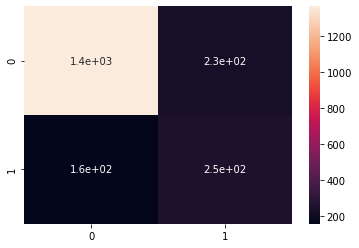

In [39]:
rf_cm2 = confusion_matrix(y_test, y_pred2) # measure using confusion metrix
sns.heatmap(rf_cm2, annot=True) # plot the confusion metrix
print(rf_cm2)
print(classification_report(y_test, y_pred2))

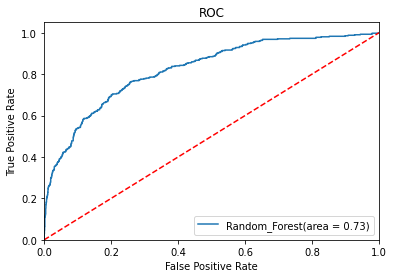

In [40]:
auc_curve_graph('Random_Forest',grid_model)

Since we are predicting the exit, which is the bank churn. After the hyper parimter tuning, the model performs better in predicting 1 which is the exit, f1 score increases together with micro average and weighted average as compared to previous with higher roc area covered.

### Feature Importance

In [46]:
# as per tested, assisgned best parimeter to variable best
best = RandomForestClassifier(max_depth = 7, max_features=8, n_estimators = 100, random_state = 11)

In [47]:
model_rf = best.fit(X_train_rs, y_train_rs)

In [48]:
model_rf.feature_importances_

array([0.01395916, 0.0209132 , 0.0161136 , 0.5323938 , 0.01476057,
       0.31279709, 0.00189699, 0.0713126 , 0.015853  ])

<AxesSubplot:>

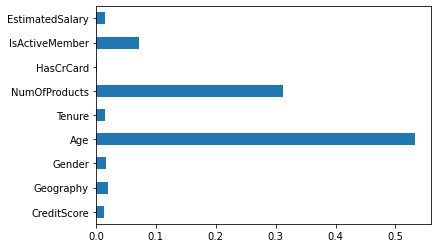

In [49]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

From the graph of featured importance for the training, we can observe that the most important is the age of the clients hence would advise the bank to focus on the different age needs and customised products based on the growth pattern of the age. With this it lets clients felt participation of bank through the growing stages of their life, offering different products based on client's growing stages, and to tackle the second feature namely the number of products, which in turn create active member which is the third feature of he rank of featured importance. for example: starts from from infant, to offer saving accounts, than young products with limited limit and attractive designs and trends, for mid age will be offering loans with attractive rates and saving plans and lastly eldierlies to offer retirement packages or healthcare incentives.

                                  Thank you